# [과제 2] 회귀분석
### - Ch 1, Ch 2를 토대로 자유롭게 회귀분석과 회귀진단을 진행해주세요.
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

# Data 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction 

< y > 
* **Price** : The price of the used car in INR Lakhs.



< X > 
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [2]:
# Load Data 
data = pd.read_csv("/content/drive/MyDrive/ToBig's/week2/assignment2_data.csv")
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
data["Time"] = 2022 - data["Year"] #현재로부터 지난 시간에 따라 구분하기 위해 새로운 변수 생성
data["Time"]

0       12
1        7
2       11
3       10
4        9
        ..
6014     8
6015     7
6016    10
6017     9
6018    11
Name: Time, Length: 6019, dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
 14  Time               6019 non-null   int64  
dtypes: float64(2), int64(4), object(9)
memory usage: 705.5+ KB


In [5]:
data['Power'] = data['Power'].replace('null bhp', np.nan)
# 결측치 제거 진행 결과 결측치가 NaN이 아닌 null bhp로 표기되어있는 경우가 존재
#nan로 바꿔주는 과정 수행

In [6]:
#결측치 삭제 진행 ('Mileage', 'Engine', 'Power'에 결측치가 존재하는 row만)
data_nonnull = data.dropna(subset = ['Mileage', 'Engine', 'Power'])

In [7]:
#단위와 함께 표기되어 있는 feature의 단위 삭제
data_nonnull['Mileage_float'] = pd.to_numeric(data_nonnull['Mileage'].str.split(" ").str[0])
data_nonnull['Engine_float'] = pd.to_numeric(data_nonnull['Engine'].str.split(" ").str[0])
data_nonnull['Power_float'] = pd.to_numeric(data_nonnull['Power'].str.split(" ").str[0])
#단위 삭제 후 numeric으로 변환 진행

In [16]:
data_nonnull.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Time,Mileage_float,Engine_float,Power_float
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,12,26.60,998,58.16
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,7,19.67,1582,126.20
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,11,18.20,1199,88.70
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,10,20.77,1248,88.76
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,9,15.20,1968,140.80


In [9]:
#타겟과 상관계수가 높은 feature 탐색
data_corr = data_nonnull.corr()
corr_order = data_corr.loc[:, 'Price'].abs().sort_values(ascending=False)
corr_order

Price                1.000000
Power_float          0.772837
Engine_float         0.658044
Mileage_float        0.340554
Time                 0.299543
Year                 0.299543
Seats                0.055547
Unnamed: 0           0.020963
Kilometers_Driven    0.008298
Name: Price, dtype: float64

Power, Engine, Mileage, Time(Year) 순으로 타겟값과 상관관계가 높은 것을 확인할 수 있었다.
(수치형 변수만 고려했을 시)

상관관계가 높은 feature들로 scatter 그래프를 그려보고, 시각적으로 확인해본다.

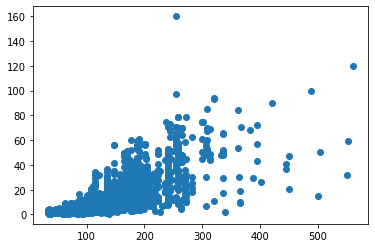

In [12]:
# power에 따라 가격이 변화하는지 확인
plt.scatter(data_nonnull["Power_float"], data_nonnull['Price'])
plt.show()

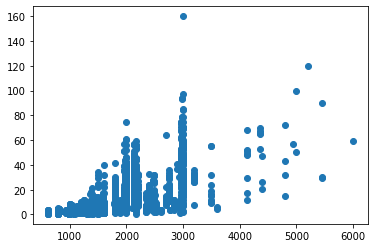

In [14]:
# engine에 따라 가격이 변화하는지 확인
plt.scatter(data_nonnull["Engine_float"], data_nonnull['Price'])
plt.show()

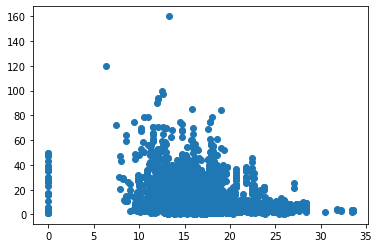

In [15]:
# Mileage에 따라 가격이 변화하는지 확인
plt.scatter(data_nonnull["Mileage_float"], data_nonnull['Price'])
plt.show()

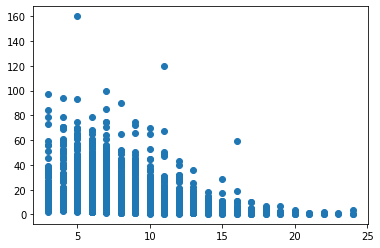

In [13]:
# year에 따라 가격이 변화하는지 확인
plt.scatter(data_nonnull["Time"], data_nonnull['Price'])
plt.show()

그래프적 방법으로 선형성을 판단했을 때,


*   power, engine은 선형적으로 비례적인 관계를 보인다.
*   mileage, Time은 어느정도 증가함에 따라 타겟값이 감소하는 경향성이 있다.


등분산성을 보았을 때,
*   대체적으로 오차의 분산이 일정하지 않은 부분이 보였다. 이로 인해 회귀 분석한 결과가 정확도가 떨어질 수 있을 것이라고 생각할 수 있다.





In [44]:
#OLS를 사용하기 위해 라이브러리 불러오기
import statsmodels.formula.api as smf
data_ols = smf.ols('Price ~ Mileage_float + Power_float + Engine_float + Time', data_nonnull).fit()
data_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     3132.
Date:                Tue, 02 Aug 2022   Prob (F-statistic):               0.00
Time:                        07:51:29   Log-Likelihood:                -19195.
No. Observations:                5874   AIC:                         3.840e+04
Df Residuals:                    5869   BIC:                         3.843e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.1174      0.802      0.146      0.884      -1.455       1.690
Mileage_float    -0.0114      0.026     -0.439      0.661      -0.062       0.039
Power_float       0.1517      0.003     48.682      0.000       0.146       0.158
Engine_float      0.0009      0.000      2.834      0.005       0.000       0.001
Time             -1.0420      0.028    -37.284      0.000      -1.097      -0.987
==============================================================================
Omnibus:                     4153.345   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           310726.035
Skew:                           2.685   Prob(JB):                         0.00
Kurtosis:                      38.224   Cond. No.                     1.68e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

OLS를 이용해서 Durbin-Watson 값을 구해본 결과 2에 가까우므로 오차항의 자기상관이 없음을 알 수 있다. 즉, 독립성을 만족한다.



추려진 4가지 feature들을 이용하여 다중 선형회귀분석을 진행해보자

In [33]:
#x_data, y_data 정의
x_data = data_nonnull[['Mileage_float', 'Power_float', 'Engine_float', 'Time']]
y_data = data_nonnull['Price']

In [34]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(x_data, y_data)
pred = model.predict(x_data)

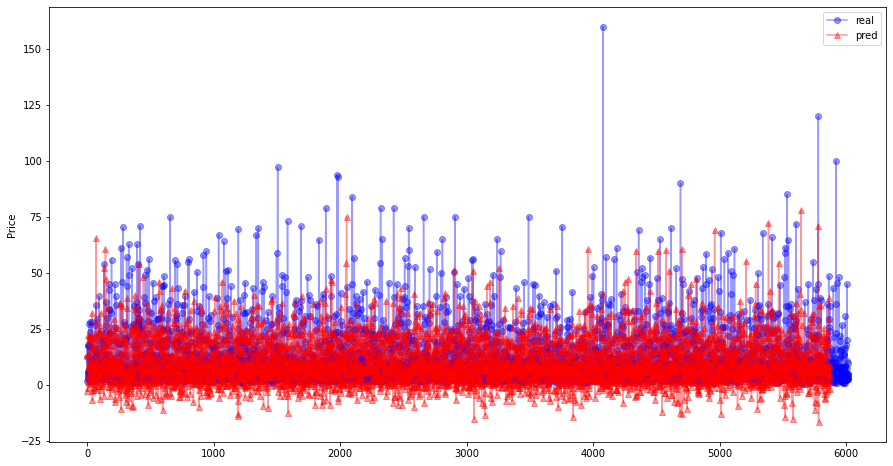

In [35]:
# 실제값과 예측값을 시각화해본다

fig = plt.figure(figsize=(15,8))
graph = fig.add_subplot(1, 1, 1)
graph.plot(y_data, marker='o', color='blue', label='real', alpha = 0.4)
graph.plot(pred, marker='^', color='red', label='pred', alpha = 0.4)
plt.ylabel('Price')
plt.legend()

In [36]:
mse = ((y_data - pred)**2).mean()
print('MSE :', mse)

MSE : 40.35897381852427


'Mileage_float', 'Power_float', 'Engine_float', 'Time'으로 선형회귀한 실제값을 비교해봤을 때,


*   실제값보다 작게 관측하는 경향을 볼 수 있었다.

-> Time 변수가 작게 관측하는 것에 영향을 미친다고 생각하여 Time 변수를 제거하고 다시 회귀분석을 수행해보기로 결정



In [37]:
x_data = data_nonnull[['Mileage_float', 'Power_float', 'Engine_float']]
y_data = data_nonnull['Price']

In [38]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(x_data, y_data)
pred = model.predict(x_data)

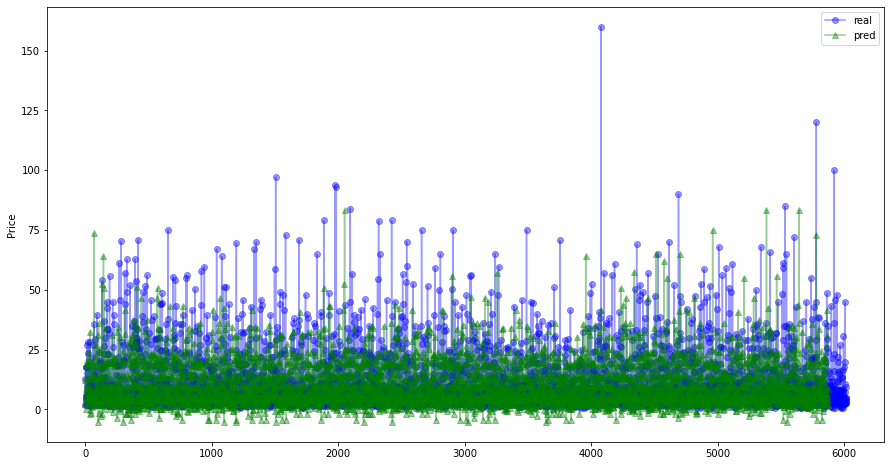

In [41]:
# 실제값과 예측값을 시각화해본다

fig = plt.figure(figsize=(15,8))
graph = fig.add_subplot(1, 1, 1)
graph.plot(y_data, marker='o', color='blue', label='real', alpha = 0.4)
graph.plot(pred, marker='^', color='green', label='pred', alpha = 0.4)
plt.ylabel('Price')
plt.legend()

In [40]:
mse = ((y_data - pred)**2).mean()
print('MSE :', mse)

MSE : 49.91826857505524


Time 변수를 제거했을 때,

*   예측값이 조금 더 올라가는 모습을 볼 수 있었음
*   그러나 전반적으로 (mse값을 봤을 때)는 예측 정확도가 감소하기에 Time 변수를 포함하는 것이 옳다고 결정하게됨.





---



범주형 변수를 이용해 로지스틱 회귀분석 진행하기